# Preprocessing steps for an EEG
- Load the data
- Print information about the data
- load the annotations using scripts from suzanne in matlab via matlab engine
- add the annotations to the file
- check the file visually ('bad' annotations can be added here for artifacts)
- check the psd of the eeg channels
- filter between 0.5 and 35 hz
- resample to 100hz sampling freq
- recheck psd and data
- save file to fif format

## Set up environment

In [1]:
from PreprocessingFunctions import *

In [2]:
mne.set_config('MNE_BROWSER_BACKEND', 'qt')
# if error on linux (debian) see the following link: https://web.stanford.edu/dept/cs_edu/resources/qt/install-linux
# if error on linux (arch) install qtcreator from pacman: pacman -S qtcreator

Using qt as 2D backend.


In [3]:
mne.set_log_level(verbose='WARNING')

## Load data

In [4]:
sampleSignalPath = '../example/eeg/PN001-original.edf' #'/path/to/edf/sample.edf'
annot_path = sampleSignalPath.replace('original.edf', 'annot-sz.mat')  # works only if there is allready an existing annotation
out_path = sampleSignalPath.replace('original.edf', 'preprocessed-raw.fif')
raw = mne.io.read_raw(sampleSignalPath)

/tmp/ipykernel_29825/3529129933.py:4: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw(sampleSignalPath)
/tmp/ipykernel_29825/3529129933.py:4: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw(sampleSignalPath)
/tmp/ipykernel_29825/3529129933.py:4: RuntimeWarning: Highpass cutoff frequency 15.91549 is greater than lowpass cutoff frequency 15.0, setting values to 0 and Nyquist.
  raw = mne.io.read_raw(sampleSignalPath)


In [5]:
raw = raw.pick_types(eeg=True)
print(raw)
print(raw.info)
print(raw.ch_names)
print(raw.info['subject_info'])

<RawEDF | PN001-original.edf, 35 x 1344000 (2625.0 s), ~31 kB, data not loaded>
<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 35 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: 2016-01-01 19:39:33 UTC
 nchan: 35
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>
['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 'EEG F9', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'EEG Fp2', 'EEG F4', 'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10', 'EKG EKG', 'SPO2', 'HR', '1', '2', 'MK']
{'his_id': ''}


## Extract info about data

In [6]:
# be aware that this needs to have matlab set up with the script accessible otherwise it will fail, also needs matlab engine for python to work
# raw = update_annotations_suzanne(raw, annot_path, sampleSignalPath, method='replace')

## First visual inspection of the data

In [7]:
raw.plot(duration=20, remove_dc=False, block=True, show_options=True)

/tmp/ipykernel_29825/3222297335.py:1: UserWarning: Zero value in spectrum for channels SPO2, HR
  raw.compute_psd(fmax=70, remove_dc=False).plot(average='mean', picks='eeg')
/tmp/ipykernel_29825/3222297335.py:1: UserWarning: Infinite value in PSD for channels SPO2, HR.
These channels might be dead.
  raw.compute_psd(fmax=70, remove_dc=False).plot(average='mean', picks='eeg')
/home/soenkevanloh/Documents/EEGAnalyzer/.venv/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


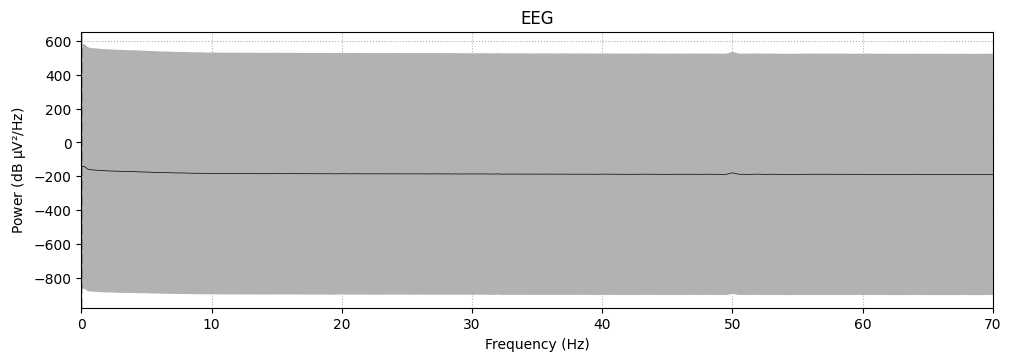

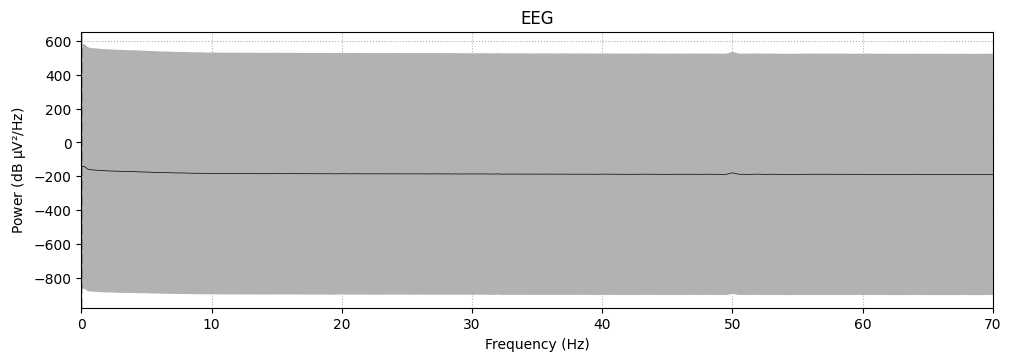

In [8]:
raw.compute_psd(fmax=70, remove_dc=False).plot(average='mean', picks='eeg')

## Load the data and filter it

In [9]:
l_freq = 0.5 #if should not be changed use raw.info['highpass']
h_freq = 35 #if should not be changed use raw.info['lowpass']
sfreq = 200 #if should not be changed use raw.info['sfreq']

In [10]:
raw_unfiltered = raw.copy()
raw.load_data()
raw.filter(l_freq=l_freq,h_freq=h_freq)

<RawEDF | PN001-original.edf, 35 x 1344000 (2625.0 s), ~358.9 MB, data loaded>

In [11]:
raw.resample(sfreq)

<RawEDF | PN001-original.edf, 35 x 525000 (2625.0 s), ~140.2 MB, data loaded>

/tmp/ipykernel_29825/1798295082.py:1: UserWarning: Zero value in spectrum for channels SPO2, HR
  raw.compute_psd(fmax=40, remove_dc=False, picks='eeg').plot(average='mean')
/tmp/ipykernel_29825/1798295082.py:1: UserWarning: Infinite value in PSD for channels SPO2, HR.
These channels might be dead.
  raw.compute_psd(fmax=40, remove_dc=False, picks='eeg').plot(average='mean')
/home/soenkevanloh/Documents/EEGAnalyzer/.venv/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


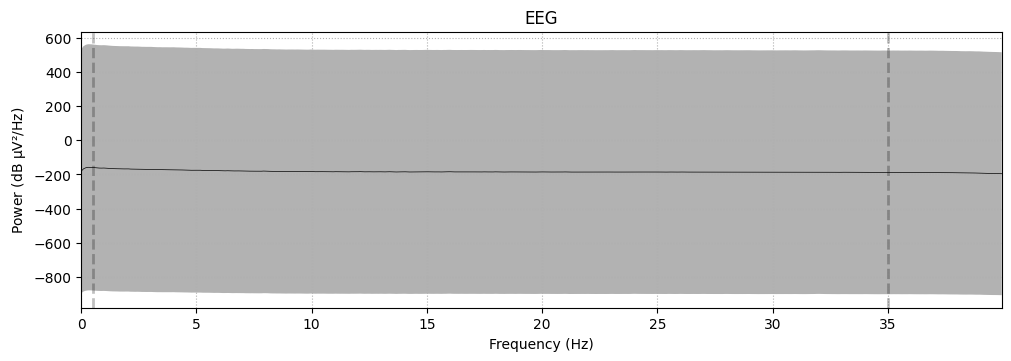

In [12]:
raw.compute_psd(fmax=40, remove_dc=False, picks='eeg').plot(average='mean')

In [13]:
raw.plot(duration=20, remove_dc=False, block=True, show_options=True)

In [14]:
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 35 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 35.0 Hz
 meas_date: 2016-01-01 19:39:33 UTC
 nchan: 35
 projs: []
 sfreq: 200.0 Hz
 subject_info: 1 item (dict)
>


## Check different montages

In [15]:
raw_remontaged = raw.copy()
print(f'Allready bypolar montage: {only_keep_10_20_channels_and_check_bipolar(raw_remontaged)}')
raw_remontaged = change_montage(raw=raw_remontaged.pick(picks='eeg', exclude='bads'), montage='doublebanana')

Allready bypolar montage: False


ic| mne.set_bipolar_reference(inst=raw_internal, anode=anode_eeg_channels, cathode=cathode_eeg_channels,
                              ch_name=new_names, copy=False): <RawEDF | PN001-original.edf, 18 x 525000 (2625.0 s), ~72.1 MB, data loaded>


In [16]:
print(raw_remontaged.info)

<Info | 10 non-empty values
 bads: []
 ch_names: Fp2-F8, F8-T4, T4-T6, T6-O2, Fp2-F4, F4-C4, C4-P4, P4-O2, Fz-Cz, ...
 chs: 18 EEG
 custom_ref_applied: True
 dig: 0 items
 highpass: 0.5 Hz
 lowpass: 35.0 Hz
 meas_date: 2016-01-01 19:39:33 UTC
 nchan: 18
 projs: []
 sfreq: 200.0 Hz
 subject_info: 1 item (dict)
>


In [17]:
raw_remontaged.plot(duration=20, remove_dc=False, block=True, show_options=True)

# Save Data

In [18]:
raw.save(out_path, overwrite=False)